In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import tweepy
import re
from wordcloud import WordCloud

Credentials

In [2]:
apikey="LXdmMDY9H1zXgCwIrZrpmkIX5"
apisecretkey="A6mMuC8hQzPr9J98UupKOW5oBatQeNzRQib8Q57rluj6n5Rw7Z"
accesstoken="1494028931787530240-l1MDB5gq2svMt8sRKVCl7rhyBiZWvN"
accessSecretToken="hxWJlFAXYa51VYRJ2njwZepK1FSpzRIrwFklqiA7riEYC"

Authenticating twitter credentials as they are required to use outside twitter

In [3]:
authenticate=tweepy.OAuthHandler(apikey,apisecretkey)
authenticate.set_access_token(accesstoken,accessSecretToken)
api=tweepy.API(authenticate)

Extracting live tweets

In [4]:
user_name=input("Enter the user name for which you want the tweet analysis:")
c=int(input("How many tweets to be analysed:"))
posts=api.user_timeline(screen_name=user_name,count=c,tweet_mode='extended')


Enter the user name for which you want the tweet analysis:imVkohli
How many tweets to be analysed:500


These posts were not in readable form so converting them to readable form

In [5]:
i=1
for tweets in posts[:5]:
    print(str(i)+'(' +tweets.full_text+'\n')
    i=i+1

1(Heading into the 15th year of #IPL, I look back fondly on all the memories, relationships, and learnings, on the RCB Podcast. Watch the full video on @RCBTweets https://t.co/9YJWJsn8Lp

2(Season's bestseller for a reason!
The all new one8 mini's are worth a shot!
Get the experience from here- https://t.co/J5HvNFSfCQ

@ScentialsWorld @one8world
#newlaunch #one8fragrances #one8 #ad https://t.co/0WdOTApdse

3(Yuvi Pa thank you for this lovely gesture.Your comeback from cancer will always be an inspiration for people in all walks of life not just cricket. You have always been generous and caring for people around you.I wish you all the happiness,God bless @YUVSTRONG12. Rab rakha 🙏😊 https://t.co/KDrd2JQCHU

4(What should we name this cutie? Sunshine or Bluey?  

There's no easy answer since both Sunshine Gold &amp; Midnight Blue of the new V23e are designed to delight. 

Which one would you pick? Tell me in the comments below.

#DelightEveryMoment #ad @Vivo_India https://t.co/tfV9J9Ce5v



In [6]:
df=pd.DataFrame([tweets.full_text for tweets in posts],columns=['Tweets'])
df

,Tweets
0,"Heading into the 15th year of #IPL, I look bac..."
1,Season's bestseller for a reason!\nThe all new...
2,Yuvi Pa thank you for this lovely gesture.Your...
3,What should we name this cutie? Sunshine or Bl...
4,Find the odd one out. https://t.co/cJCpNGmQfP
...,...
195,⏳ https://t.co/WvTeMyeRZ5
196,#Newlaunch\nA kit for your all travel needs!🙌\...
197,🏆 https://t.co/ByGLRMLauT
198,Fake candid shot 📸 https://t.co/3ZCNTDVBn6


In [7]:
def cleantxt(text):
    text=re.sub('@[A-Za-z0-9]+','',text)
    text=re.sub('#','',text)
    text=re.sub('RT[\s]+','',text)
    text=re.sub('https?:\/\/\S+','',text)
    return text
    

In [8]:
df['Tweets']=df['Tweets'].apply(cleantxt)
df

,Tweets
0,"Heading into the 15th year of IPL, I look back..."
1,Season's bestseller for a reason!\nThe all new...
2,Yuvi Pa thank you for this lovely gesture.Your...
3,What should we name this cutie? Sunshine or Bl...
4,Find the odd one out.
...,...
195,⏳
196,Newlaunch\nA kit for your all travel needs!🙌\n...
197,🏆
198,Fake candid shot 📸


In [9]:
#here begins the sentimental process
analysis=TextBlob("  Kishan bad")
analysis.sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [10]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [11]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [30]:
df['Subjectivity']=df['Tweets'].apply(getsubjectivity)
df['Polarity']=df['Tweets'].apply(getpolarity)
df

,Tweets,Subjectivity,Polarity,Sentiments,sentimentals
0,"Heading into the 15th year of IPL, I look back...",0.275000,0.175000,Positive,2
1,Season's bestseller for a reason!\nThe all new...,0.277273,0.255682,Positive,2
2,Yuvi Pa thank you for this lovely gesture.Your...,0.750000,0.500000,Positive,2
3,What should we name this cutie? Sunshine or Bl...,0.462626,-0.026768,Negative,0
4,Find the odd one out.,0.250000,-0.166667,Negative,0
...,...,...,...,...,...
195,⏳,0.000000,0.000000,Neutral,1
196,Newlaunch\nA kit for your all travel needs!🙌\n...,0.300000,1.000000,Positive,2
197,🏆,0.000000,0.000000,Neutral,1
198,Fake candid shot 📸,0.900000,0.050000,Positive,2


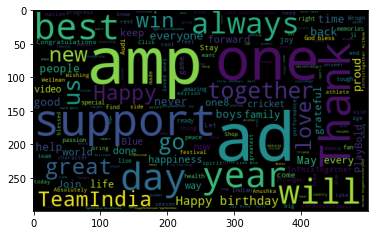

In [13]:
allwords=' '.join([i for i in df['Tweets']])
cloud=WordCloud(width=500,height=300,random_state=10,max_font_size=100).generate(allwords)
plt.imshow(cloud)
plt.show()

In [14]:
#analysing
def getAnalysis(score):
    if(score>0):
        return "Positive"
    elif score==0:
        return "Neutral"
    else:
        return "Negative"
df['Sentiments']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Sentiments
0,"Heading into the 15th year of IPL, I look back...",0.275000,0.175000,Positive
1,Season's bestseller for a reason!\nThe all new...,0.277273,0.255682,Positive
2,Yuvi Pa thank you for this lovely gesture.Your...,0.750000,0.500000,Positive
3,What should we name this cutie? Sunshine or Bl...,0.462626,-0.026768,Negative
4,Find the odd one out.,0.250000,-0.166667,Negative
...,...,...,...,...
195,⏳,0.000000,0.000000,Neutral
196,Newlaunch\nA kit for your all travel needs!🙌\n...,0.300000,1.000000,Positive
197,🏆,0.000000,0.000000,Neutral
198,Fake candid shot 📸,0.900000,0.050000,Positive


In [15]:
df['Sentiments'].value_counts()

Positive    113
Neutral      69
Negative     18
Name: Sentiments, dtype: int64

In [16]:
len(df['Sentiments'].value_counts())

3

In [17]:
sentiments=df['Sentiments'].value_counts().index.tolist()
sentiment_score=df['Sentiments'].value_counts()
sentiments

['Positive', 'Neutral', 'Negative']

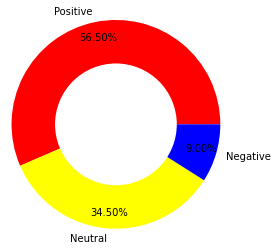

In [18]:
plt.pie(sentiment_score,labels=sentiments,autopct='%0.2f%%',radius=1.2, pctdistance=0.85,colors=['red','yellow','blue'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [19]:
#model training

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
df['sentimentals']=le.fit_transform(df['Sentiments'])
df.head(30)


,Tweets,Subjectivity,Polarity,Sentiments,sentimentals
0,"Heading into the 15th year of IPL, I look back...",0.275000,0.175000,Positive,2
1,Season's bestseller for a reason!\nThe all new...,0.277273,0.255682,Positive,2
2,Yuvi Pa thank you for this lovely gesture.Your...,0.750000,0.500000,Positive,2
3,What should we name this cutie? Sunshine or Bl...,0.462626,-0.026768,Negative,0
4,Find the odd one out.,0.250000,-0.166667,Negative,0
5,"Thanks for these tips, . Infact they have cool...",0.590000,0.385000,Positive,2
6,Went down to the wire. Great character on disp...,0.519444,0.322222,Positive,2
7,"1 down, 2 to go 🇮🇳",0.288889,-0.155556,Negative,0
8,A icon of the Indian music industry. Bappi Lah...,0.000000,0.000000,Neutral,1
9,🔜 T20s \nTeamIndia 🇮🇳,0.000000,0.000000,Neutral,1


In [23]:
df.isna().describe()

,Tweets,Subjectivity,Polarity,Sentiments,sentimentals
count,200,200,200,200,200
unique,1,1,1,1,1
top,False,False,False,False,False
freq,200,200,200,200,200


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['Tweets'],df['sentimentals'],test_size=0.35)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([('Vectorizer',CountVectorizer()),('model',LogisticRegression())])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7857142857142857

In [29]:
tweet=['Happy Birthday Maa ❤️	']
pipe.predict(tweet)

array([2])